#  Table of Contents

     Key Questions:
     1. Busiest days of the week and hours of the day
     2. Whether there are particular times of the day when people spend the most money
     3. Instacart has a lot of products with different price tags. Marketing and sales want to use simpler price range groupings to help direct their efforts.
     4. Are there certain types of products that are more popular than others? The marketing and sales teams want to know which departments have the highest frequency of product orders
     5. The marketing and sales teams are particularly interested in the different types of customers in their system and how   their ordering behaviors differ. For example:
       5.a What’s the distribution among users in regards to their brand loyalty (i.e., how often do they return to Instacart)?
       5.b Are there differences in ordering habits based on a customer’s loyalty status?
       5.c Are there differences in ordering habits based on a customer’s region?
       5.d Is there a connection between age and family status in terms of ordering habits?
       5.e What different classifications does the demographic information suggest? Age? Income? Certain types of goods? Family  status?
     
  
     
     

# 1.The sales team needs to know what the busiest days of the week and hours of the day are (i.e., the days and times with the most orders) in order to schedule ads at times when there are fewer orders

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns 
import scipy 

In [2]:
# Set path
path = r'C:\Users\Goce\Desktop\Achievement 4 Python Fundamentals'

In [3]:
#importing data
active_cust_dpt = pd.read_pickle(os.path.join( path, 'Data', 'Prepared Data', 'active_cust_dpt.pkl'))

In [4]:
# Set the max_columns option to None
pd.set_option('display.max_columns', None)

In [5]:
#checking the shape of the dataframe
active_cust_dpt.shape

(30964564, 38)

In [6]:
#checking dataframe
active_cust_dpt.head()

,user_id,gender,state,age,date_joined,number_of_dependants,marital_status,income,order_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last-order,new_customer,product_id,add_to_cart_order,reordered,product_name,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,user_avg_price,spending_flag,median_prior_orders,order_frequency_flag,region,customer_activity,age_group,Income_Group,department,baby_stuff,alcohol,Family_Status_Flag
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,2543867,5,1,9,30.0,False,196,2,0,Soda,7,9.0,Mid-range product,Regularly busy,Busiest days,Most orders,8,New customer,7.988281,Low spender,19.0,Regular customer,Midwest,High active,Middle-aged Adults,High Income,beverages,0,0,Married with Dependants
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,1285508,7,5,15,11.0,False,196,1,1,Soda,7,9.0,Mid-range product,Regularly busy,Regularly busy,Most orders,8,New customer,7.988281,Low spender,19.0,Regular customer,Midwest,High active,Middle-aged Adults,High Income,beverages,0,0,Married with Dependants
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,2578584,8,1,15,10.0,False,196,2,1,Soda,7,9.0,Mid-range product,Regularly busy,Busiest days,Most orders,8,New customer,7.988281,Low spender,19.0,Regular customer,Midwest,High active,Middle-aged Adults,High Income,beverages,0,0,Married with Dependants
3,33890,Female,New Mexico,36,1/1/2017,0,single,59285,1044841,3,6,11,30.0,False,196,1,0,Soda,7,9.0,Mid-range product,Regularly busy,Regularly busy,Most orders,12,Regular customer,7.058594,Low spender,26.0,Non-frequent customer,West,High active,Middle-aged Adults,Low Income,beverages,0,0,Single no Dependants
4,33890,Female,New Mexico,36,1/1/2017,0,single,59285,474720,4,1,20,16.0,False,196,6,1,Soda,7,9.0,Mid-range product,Regularly busy,Busiest days,Average orders,12,Regular customer,7.058594,Low spender,26.0,Non-frequent customer,West,High active,Middle-aged Adults,Low Income,beverages,0,0,Single no Dependants


In [7]:
#checking the bottom
active_cust_dpt.tail()

,user_id,gender,state,age,date_joined,number_of_dependants,marital_status,income,order_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last-order,new_customer,product_id,add_to_cart_order,reordered,product_name,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,user_avg_price,spending_flag,median_prior_orders,order_frequency_flag,region,customer_activity,age_group,Income_Group,department,baby_stuff,alcohol,Family_Status_Flag
30964559,61695,Male,Minnesota,43,4/1/2020,3,married,116924,2774777,7,5,10,7.0,False,30094,1,0,Rapid Result Pregnancy Test Kit,2,5.398438,Mid-range product,Regularly busy,Regularly busy,Most orders,25,Regular customer,8.398438,Low spender,7.0,Frequent customer,Midwest,High active,Middle-aged Adults,Medium Income,other,1,0,Married with Dependants
30964560,122741,Male,Michigan,24,4/1/2020,2,married,73357,1176009,1,5,17,NaN,True,29659,3,0,Early Result Pregnancy Test,2,9.203125,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,8.976562,Low spender,30.0,Non-frequent customer,Midwest,High active,Young Adults,Medium Income,other,0,0,Married with Dependants
30964561,122741,Male,Michigan,24,4/1/2020,2,married,73357,1029013,2,3,11,5.0,False,29659,1,1,Early Result Pregnancy Test,2,9.203125,Mid-range product,Regularly busy,Slowest days,Most orders,10,New customer,8.976562,Low spender,30.0,Non-frequent customer,Midwest,High active,Young Adults,Medium Income,other,0,0,Married with Dependants
30964562,122741,Male,Michigan,24,4/1/2020,2,married,73357,456486,3,1,16,19.0,False,29659,1,1,Early Result Pregnancy Test,2,9.203125,Mid-range product,Regularly busy,Busiest days,Most orders,10,New customer,8.976562,Low spender,30.0,Non-frequent customer,Midwest,High active,Young Adults,Medium Income,other,0,0,Married with Dependants
30964563,122741,Male,Michigan,24,4/1/2020,2,married,73357,456486,3,1,16,19.0,False,36066,2,0,SleepGels Nighttime Sleep Aid,2,13.296875,Mid-range product,Regularly busy,Busiest days,Most orders,10,New customer,8.976562,Low spender,30.0,Non-frequent customer,Midwest,High active,Young Adults,Medium Income,other,0,0,Married with Dependants


1.a Busiest days of the week 

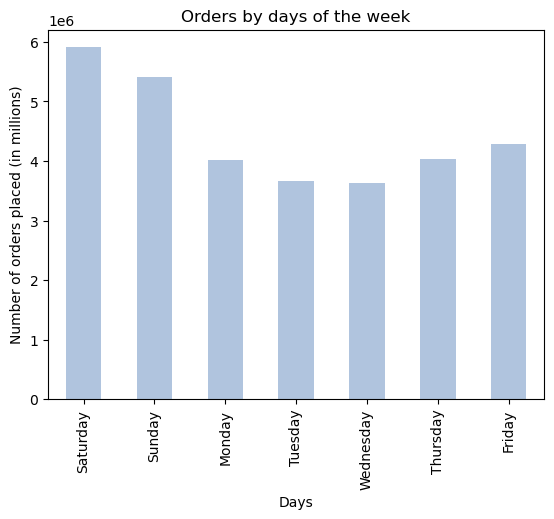

In [8]:
# Define a list of day names corresponding to the numerical values (0-6)
day_names = ['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']

# Create a bar chart for busiest days of the week
ax = active_cust_dpt['orders_day_of_week'].value_counts().sort_index().plot(kind='bar', color='lightsteelblue')

# Set the labels and title for the plot
plt.xlabel('Days')
plt.ylabel('Number of orders placed (in millions)')
plt.title('Orders by days of the week')

# Customize the x-axis tick labels with day names
ax.set_xticks(range(7))
ax.set_xticklabels(day_names)

# Save the chart as an image file (optional)
plt.savefig('busiest_days_chart.png')

# Get the figure and store it in a variable for later use
bar_busiest_days = ax.get_figure()

In [9]:
# Exporting chart 
bar_busiest_days.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'bar_busiest_days.png'))

1.b Busiest hours of the day

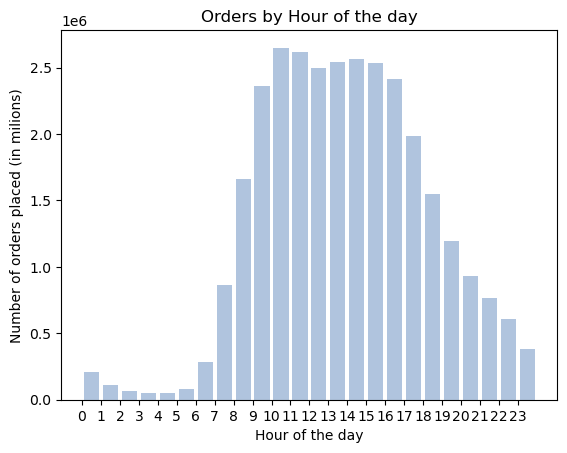

In [10]:
# Create a histogram for order hour of the day with adjusted bar width
hist_ord_hour_days = active_cust_dpt['order_hour_of_day'].plot.hist(bins=range(25), rwidth=0.8, color='lightsteelblue')

# Set the labels and title for the plot
plt.ylabel('Number of orders placed (in milions)')
plt.xlabel('Hour of the day')
plt.title('Orders by Hour of the day')

# Set the x-axis ticks to include every hour
plt.xticks(range(24))

# Save the chart as an image file (optional)
plt.savefig('hourly_orders_histogram.png')

# Get the figure and store it in a variable for later use
hourly_orders_figure = hist_ord_hour_days.get_figure()

In [11]:
# Exporting chart 
hourly_orders_figure.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'hourly_orders_figure.png'))

busiest hours in every specific day

In [12]:
crosstab_days_hours = pd.crosstab(
    active_cust_dpt['orders_day_of_week'],
    active_cust_dpt['order_hour_of_day'],
    dropna=False,
    
)

In [13]:
crosstab_days_hours

order_hour_of_day,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
orders_day_of_week,,,,,,,,,,,,,,,,,,,,,,,,
0,37261,21201,12271,8385,7973,10992,33732,129234,295324,423642,492531,508444,507714,530620,537202,522761,475228,373612,269281,205501,175654,146333,115703,68011
1,35377,17356,10095,6776,7374,13819,50963,160163,322665,488212,529173,488993,440909,436252,431977,421025,397348,320117,244481,187707,144375,114824,87339,54366
2,28248,13915,7953,6813,6560,12333,42184,118610,215623,316903,344839,336758,314156,318560,319934,318098,314981,263298,214042,161632,123678,98497,76774,50317
3,26159,12646,7991,5488,6350,11203,39657,106823,190903,267824,300752,296568,283242,288578,290856,299078,291981,247743,202202,155467,116095,96363,77991,47575
4,23287,12987,7600,6089,6508,11571,38546,109694,187368,259850,293204,288454,276359,281254,284001,286034,284756,241866,197136,160906,125145,104322,85737,52320
5,27887,14312,8881,7911,8380,14228,45061,124606,216662,303016,342526,338733,319002,321523,331431,328905,312980,258563,207269,159066,120644,94871,75335,51937
6,29823,17204,10900,7334,7618,10272,30870,114083,230565,304164,346719,356930,354413,362489,372502,360065,336407,277146,216773,163599,125318,107901,88181,60028


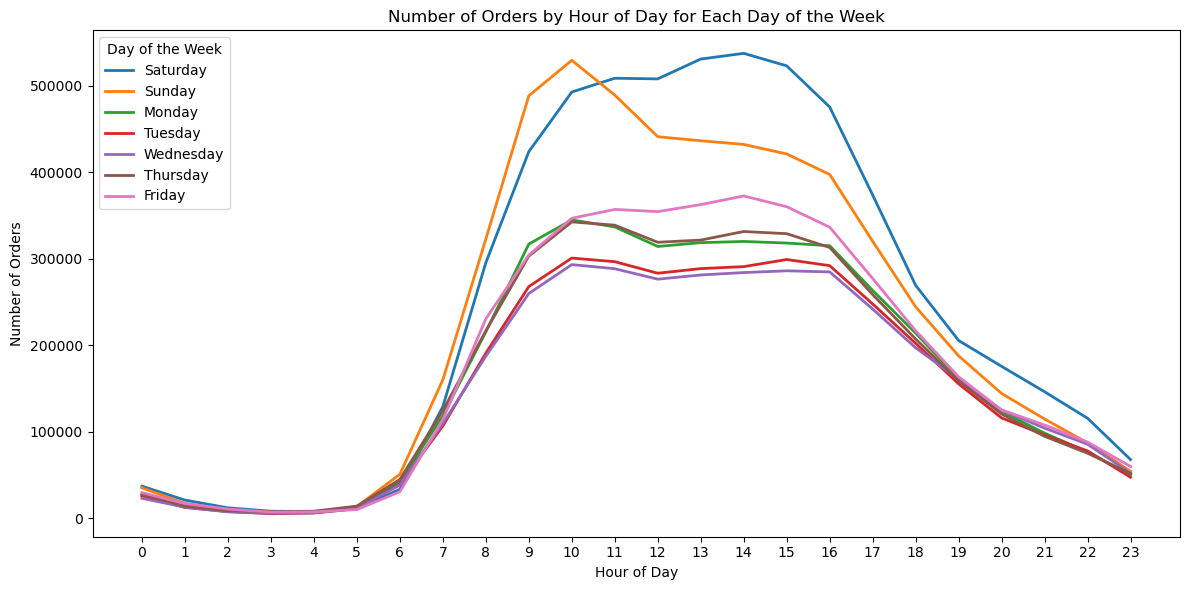

In [14]:
# Create a line chart
plt.figure(figsize=(12, 6))
for day in crosstab_days_hours.index:
    plt.plot(
        crosstab_days_hours.columns, crosstab_days_hours.loc[day],
        label=f'Day {day}',
        linewidth=2,  # Increase line thickness
    )

# Rename the legend labels
legend_labels = ['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
plt.xlabel('Hour of Day')
plt.ylabel('Number of Orders')
plt.title('Number of Orders by Hour of Day for Each Day of the Week')
plt.xticks(crosstab_days_hours.columns)
plt.legend(title='Day of the Week', labels=legend_labels, loc='upper left')
plt.tight_layout()

# Save the chart as an image file (optional)
plt.savefig('orders_by_hour_and_day.png')

# Get the figure and store it in a variable for later use
orders_by_hour_and_day_chart = plt.gcf()

In [15]:
# Exporting chart 
orders_by_hour_and_day_chart.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'line_orders_by_hour_and_day_chart.png'))

# 2. They also want to know whether there are particular times of the day when people spend the most money, as this might inform the type of products they advertise at these times.


Create sample with ranomized data in order to create line chart

In [16]:
#Set the seed for the random number generator.
#Create 30964564 random numbers (the length of  active_cust_dpt dataframe) ranging between 0 and 1.
#Code a logical test comparing each of those numbers to a value of 0.7 (either less than or greater than 0.7).
#Store the results of the test in a new list, dev, in the form of boolean values (True and False).

In [17]:
np.random.seed(4)
dev = np.random.rand(len(active_cust_dpt)) <= 0.7

In [18]:
#store 70 % of the sample in the dataframe big
big = active_cust_dpt[dev]

In [19]:
# store 30 % of the sample in the dataframe small
small = active_cust_dpt[~dev]

In [20]:
# checking 
len(active_cust_dpt)

30964564

In [21]:
len(big)+len(small)

30964564

In [22]:
# reducing  samples to only those columns necessary for the chart, namely “prices” and “order_hour_of_day.
df = small[['order_hour_of_day','prices']]

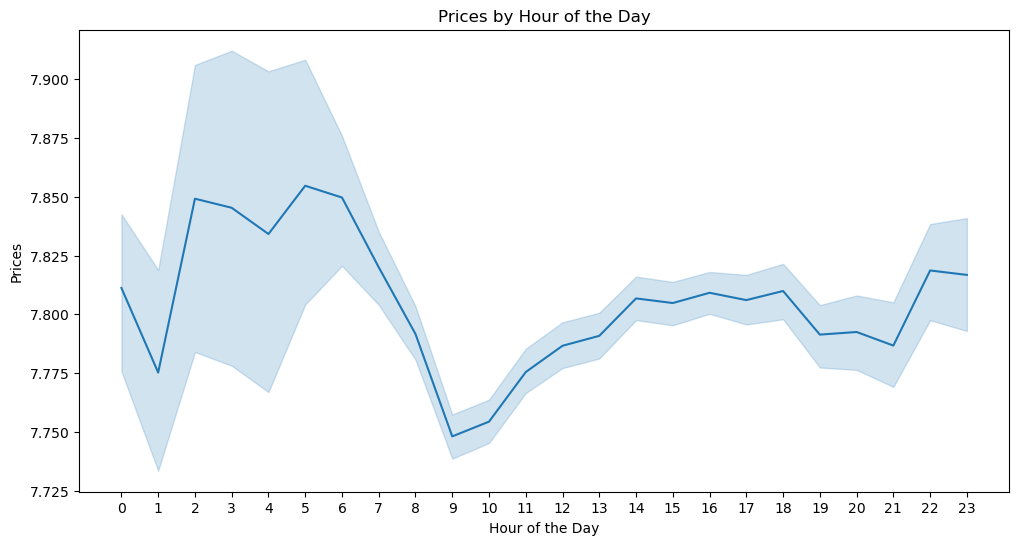

In [23]:
# Set a larger figure size to increase the distance between data points
plt.figure(figsize=(12, 6))

# Creating line chart
line_prices_hour3 = sns.lineplot(data=df, x='order_hour_of_day', y='prices')

# Customize the x-axis ticks to include every hour
plt.xticks(range(24))  # This sets the tick locations to include all 24 hours
plt.xlabel('Hour of the Day')
plt.ylabel('Prices')
plt.title('Prices by Hour of the Day')



# Get the figure and store it in a variable for later use
prices_by_hour_chart = plt.gcf()

In [24]:
# Exporting chart 
prices_by_hour_chart.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'prices_by_hour_chart.png'))

In [25]:
#checking product_name and hours_of_day
crosstab_product_hours = pd.crosstab(
    active_cust_dpt['product_name'],
    active_cust_dpt['order_hour_of_day'],
    dropna=False,
    
)

In [26]:
crosstab_product_hours

order_hour_of_day,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
product_name,,,,,,,,,,,,,,,,,,,,,,,,
#2 Coffee Filters,3,4,4,1,0,1,6,27,40,59,61,63,57,67,59,72,61,51,32,27,26,16,8,8
#2 Cone White Coffee Filters,0,0,0,0,0,0,0,1,1,4,1,0,0,0,2,1,1,0,1,0,1,0,0,0
#2 Mechanical Pencils,0,0,0,1,0,0,0,0,0,1,3,0,1,0,0,0,1,0,0,0,0,0,1,0
#4 Natural Brown Coffee Filters,3,0,0,0,0,0,0,8,18,24,26,34,19,13,16,13,15,6,8,8,8,5,3,1
#NAME?,0,0,0,0,0,0,0,2,1,5,2,3,3,1,1,3,1,0,1,4,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
with Xylitol Unwrapped Original Flavor 50 Sticks Sugar Free Gum,0,0,0,0,0,0,0,2,4,1,3,4,1,2,3,2,1,1,1,4,0,0,0,2
with Xylitol Unwrapped Spearmint 50 Sticks Sugar Free Gum,0,0,0,0,0,0,0,1,1,3,6,3,3,7,6,8,3,4,3,2,2,1,1,0
with Xylitol Watermelon Twist 18 Sticks Sugar Free Gum,0,0,1,0,0,0,0,2,3,8,5,9,5,3,7,4,4,5,2,3,4,0,1,2


In [27]:
# Filter the DataFrame to include only columns for hours 2 to 6
filtered_product_hours = crosstab_product_hours.loc[:, 2:6]

# Sum the values for each product across those columns
product_sum_2_to_6 = filtered_product_hours.sum(axis=1)

# Filter products purchased between 2 and 6 o'clock
products_purchased_2_to_6 = product_sum_2_to_6[product_sum_2_to_6 > 0]

# Sort the products by the most selling (descending order)
products_purchased_2_to_6_sorted = products_purchased_2_to_6.sort_values(ascending=False)

# Display the sorted list of products by most selling
products_purchased_2_to_6_sorted.head(20)

product_name
Banana                      7909
Bag of Organic Bananas      6373
Organic Strawberries        4528
Organic Baby Spinach        4006
Organic Hass Avocado        3512
Organic Avocado             2604
Strawberries                2459
Large Lemon                 2386
Organic Whole Milk          2370
Organic Raspberries         2362
Limes                       2039
Organic Blueberries         1728
Organic Zucchini            1694
Cucumber Kirby              1661
Organic Yellow Onion        1645
Organic Garlic              1617
Organic Lemon               1423
Apple Honeycrisp Organic    1416
Seedless Red Grapes         1408
Organic Fuji Apple          1404
dtype: int64

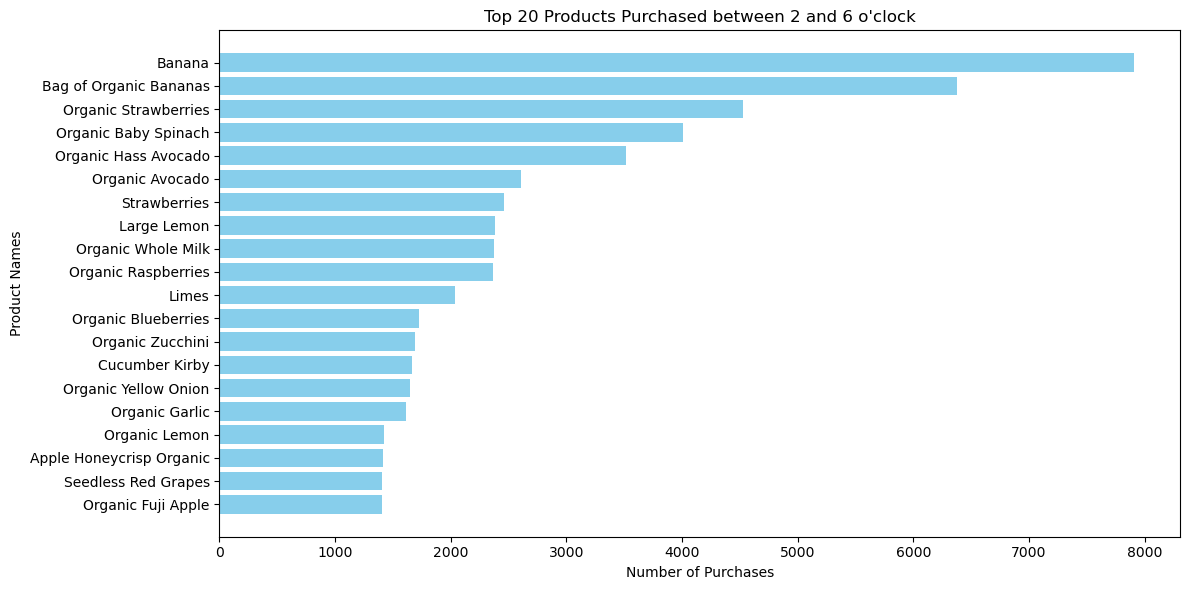

In [28]:
# Extract the top 20 products and their corresponding purchase counts
top_products = products_purchased_2_to_6_sorted.head(20)
product_names = top_products.index
purchase_counts = top_products.values
# Create a bar chart
plt.figure(figsize=(12, 6))
plt.barh(product_names, purchase_counts, color='skyblue')
plt.xlabel('Number of Purchases')
plt.ylabel('Product Names')
plt.title('Top 20 Products Purchased between 2 and 6 o\'clock')
plt.gca().invert_yaxis()  # Invert the y-axis to display the top product at the top
plt.tight_layout()


# Get the figure and store it in a variable for later use
top_products_bar_chart = plt.gcf()

In [29]:
# Exporting chart 
top_products_bar_chart.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'top_products2_6_bar_chart.png'))

In [30]:
#creating line chart for prices by day


In [31]:
# reducing  samples to only those columns necessary for the chart, namely “prices” and “orders_day_of_week.
df_days = small[['orders_day_of_week','prices']]

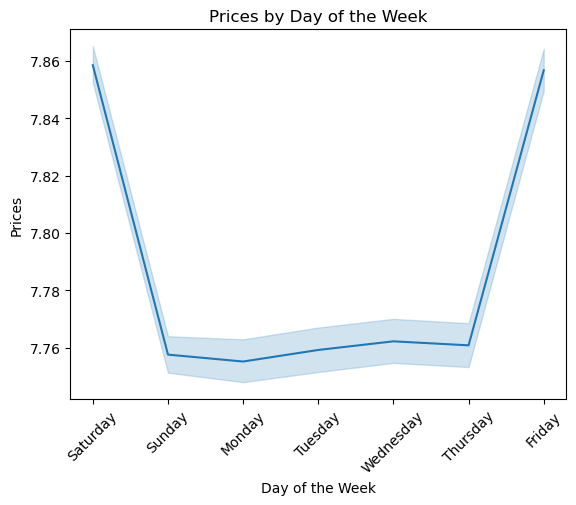

In [32]:
# Map day names to day numbers
day_names = {
    0: 'Saturday',
    1: 'Sunday',
    2: 'Monday',
    3: 'Tuesday',
    4: 'Wednesday',
    5: 'Thursday',
    6: 'Friday'
}

# Create a copy of the DataFrame to avoid the SettingWithCopyWarning
df_copy = df_days.copy()

# Map day numbers to day names in the copy of the DataFrame
df_copy['day_name'] = df_copy['orders_day_of_week'].map(day_names)

# Create a line chart
line2 = sns.lineplot(data=df_copy, x='orders_day_of_week', y='prices')

# Set the x-axis ticks and labels to display day names
days_of_week = sorted(df_copy['orders_day_of_week'].unique())
line2.set_xticks(days_of_week)
line2.set_xticklabels([day_names[day] for day in days_of_week], rotation=45)

# Set plot title and labels
plt.title('Prices by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Prices')

# Get the figure and store it in a variable for later use
figure = line2.get_figure()

In [33]:
# Exporting chart 
figure.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'figure_line_days.png'))

# 3. Instacart has a lot of products with different price tags. Marketing and sales want to use simpler price range groupings to help direct their efforts.

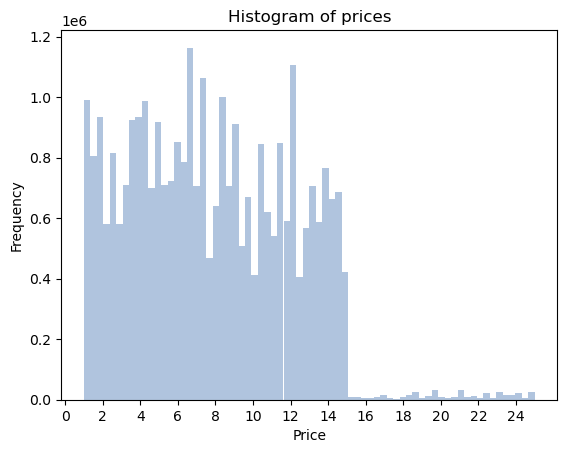

In [34]:
#histogram of prices
# create histogram 
hist=active_cust_dpt['prices'].plot.hist(bins = 70, color='lightsteelblue')
# Set the x-axis ticks to start at 0 and increment by 1
plt.xticks(range(0, int(active_cust_dpt['prices'].max()) + 1, 2))
plt.title('Histogram of prices')
plt.xlabel('Price')
plt.ylabel('Frequency')

figure_his_prices = hist.get_figure()


In [35]:
figure_his_prices = hist.get_figure()

In [36]:
# Exporting chart 
figure_his_prices.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'figure_his_prices.png'))

Text(0.5, 1.0, 'Distribution of Products by Price Range ')

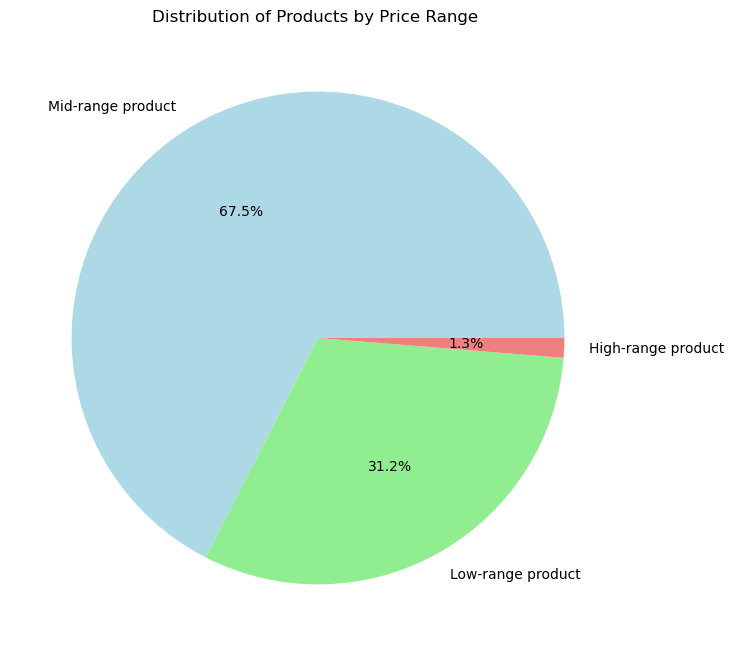

In [38]:
# Count the number of products in each price range location
price_range_loc_counts = active_cust_dpt['price_range_loc'].value_counts()

# Create a pie chart
line_price_range=plt.figure(figsize=(8, 8))
plt.pie(price_range_loc_counts, labels=price_range_loc_counts.index, autopct='%1.1f%%', colors=['lightblue', 'lightgreen', 'lightcoral'])
plt.title('Distribution of Products by Price Range ')



In [39]:
# Exporting chart 
line_price_range.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'line_price_range.png'))

# 4. Are there certain types of products that are more popular than others? The marketing and sales teams want to know which departments have the highest frequency of product orders.


Text(0.5, 1.0, 'Frequency of Orders by Department')

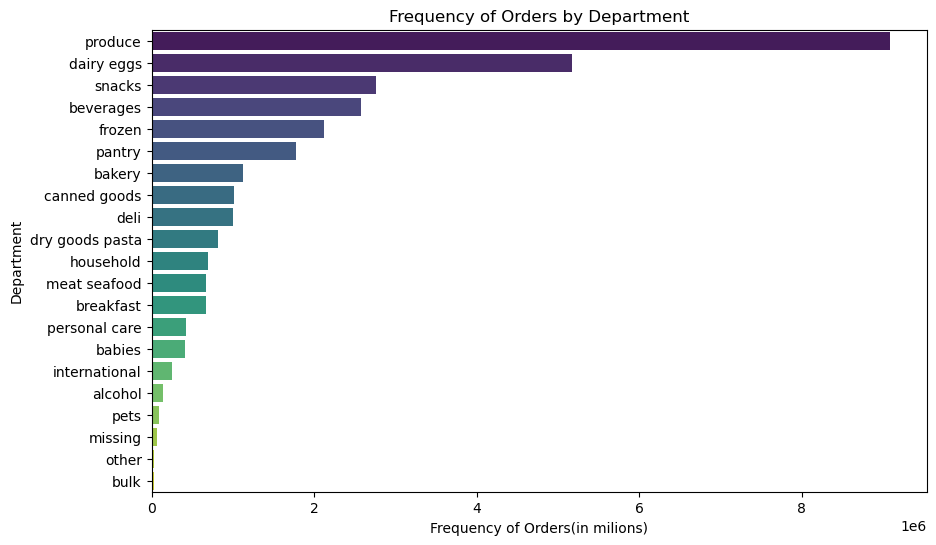

In [40]:
department_counts = active_cust_dpt['department'].value_counts()

# Create a horizontal bar chart 
bar_departments_frequency=plt.figure(figsize=(10, 6))
sns.barplot(x=department_counts.values, y=department_counts.index, palette='viridis')
plt.xlabel('Frequency of Orders(in milions)')
plt.ylabel('Department')
plt.title('Frequency of Orders by Department')

In [41]:
department_counts1 = active_cust_dpt['department'].value_counts().sort_values(ascending=False)
department_counts1.head(20)

produce            9079273
dairy eggs         5177182
snacks             2766406
beverages          2571901
frozen             2121731
pantry             1782705
bakery             1120828
canned goods       1012074
deli               1003834
dry goods pasta     822136
household           699857
meat seafood        674781
breakfast           670850
personal care       424306
babies              410392
international       255991
alcohol             144627
pets                 93060
missing              64768
other                34411
Name: department, dtype: int64

In [42]:
department_counts1.to_clipboard()

In [43]:
# Exporting chart 
bar_departments_frequency.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'bar_departments_frequency.png'))

# 5. The marketing and sales teams are particularly interested in the different types of customers in their system and how their ordering behaviors differ. For example:

# 5.a What’s the distribution among users in regards to their brand loyalty (i.e., how often do they return to Instacart)?

In [44]:
# Count the occurrences of each loyalty flag
loyalty_flag_counts = active_cust_dpt['loyalty_flag'].value_counts()

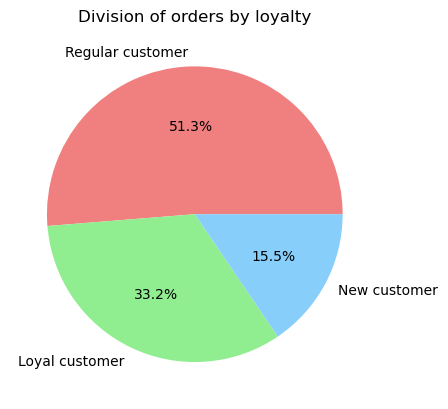

In [45]:
# Create a pie chart
fig, ax = plt.subplots()
loyalty_flag_counts.plot.pie(autopct='%1.1f%%', colors=['lightcoral', 'lightgreen', 'lightskyblue'], ax=ax)

# Add a title to the chart
ax.set_title('Division of orders by loyalty')

# Remove the y-axis label
ax.set_ylabel('')

# Save the figure for later use
fig.savefig('loyalty_pie_chart.png')

In [46]:
# Exporting chart 
fig.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'line_chart_loyalty_updated.png'))

In [47]:
# Count the occurrences of  loyalty flags
loyalty_flag_counts1 = active_cust_dpt['loyalty_flag'].value_counts(dropna = False)


In [48]:
loyalty_flag_counts1

Regular customer    15876776
Loyal customer      10284093
New customer         4803695
Name: loyalty_flag, dtype: int64

In [49]:
# in order to count each user only once

loyalty_flag_counts_unique=active_cust_dpt.groupby(['loyalty_flag']).user_id.nunique()

In [50]:
loyalty_flag_counts_unique

loyalty_flag
Loyal customer      17017
New customer        68750
Regular customer    76864
Name: user_id, dtype: int64

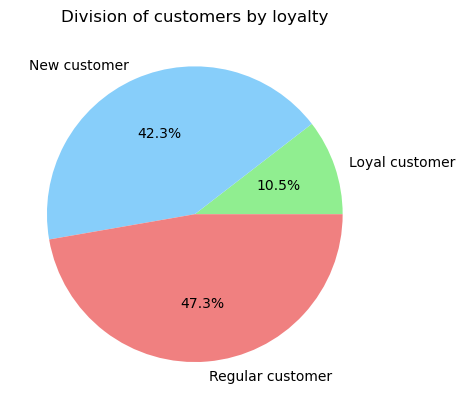

In [51]:
# Create a pie chart
fig11, ax = plt.subplots()
loyalty_flag_counts_unique.plot.pie(autopct='%1.1f%%', colors=['lightgreen', 'lightskyblue', 'lightcoral'], ax=ax)

# Add a title to the chart
ax.set_title('Division of customers by loyalty')

# Remove the y-axis label
ax.set_ylabel('')

# Save the figure for later use
fig11.savefig('loyalty_pie_chart.png')

In [52]:
# Exporting chart 
fig11.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'line_chart_loyalty_unique.png'))

# 5.b Are there differences in ordering habits based on a customer’s loyalty status?

In [53]:
#checking loyalty_flag_vs__day_of_week
crosstab_loyalty_flag_vs__day_of_week = pd.crosstab(
    active_cust_dpt['orders_day_of_week'],
    active_cust_dpt['loyalty_flag'],
    dropna=False,
    
)

In [54]:
crosstab_loyalty_flag_vs__day_of_week

loyalty_flag,Loyal customer,New customer,Regular customer
orders_day_of_week,,,
0,1754731,984879,3169000
1,1843401,818902,2749383
2,1352343,625288,2047075
3,1266495,560418,1842622
4,1292042,535931,1797021
5,1456715,587718,1989296
6,1318366,690559,2282379


In [55]:
#While Regular and New customers show similar pattern in terms of order by days (saturday busiest, following by Sunday, Friday..), Loyal customers placed their orders most often on Sunday, then Saturday and then Thursday.

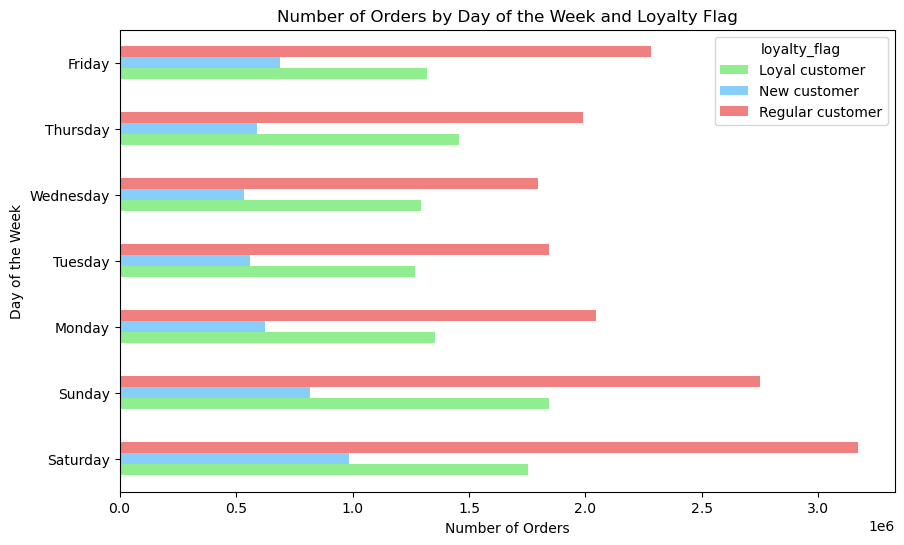

In [56]:
crosstab_data = {
    'loyalty_flag': ['Loyal customer', 'New customer', 'Regular customer'],
    'Saturday': [1754731, 984879, 3169000],
    'Sunday': [1843401, 818902, 2749383],
    'Monday': [1352343, 625288, 2047075],
    'Tuesday': [1266495, 560418, 1842622],
    'Wednesday': [1292042, 535931, 1797021],
    'Thursday': [1456715, 587718, 1989296],
    'Friday': [1318366, 690559, 2282379],
}

# Create a DataFrame from the crosstab data
df = pd.DataFrame(crosstab_data)

# Transpose the DataFrame to have 'Day_of_Week' as the index
df = df.transpose()

# Set the column names from the first row
df.columns = df.iloc[0]

# Drop the first row (header row)
df = df[1:]

# Define colors for the bars
colors=['lightgreen', 'lightskyblue', 'lightcoral']

# Create a grouped horizontal bar chart with custom colors
ax = df.plot(kind='barh', figsize=(10, 6), color=colors)

# Set the labels for the axes
ax.set_xlabel('Number of Orders')
ax.set_ylabel('Day of the Week')

# Set the title of the chart
plt.title('Number of Orders by Day of the Week and Loyalty Flag')

grouped_horizontal_bar=ax.get_figure()

In [57]:
# Exporting chart 
grouped_horizontal_bar.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'grouped_horizontal_barf.png'))

In [58]:
#checking loyalty_flag_vs__hours
crosstab_loyalty_flag_vs__order_hour_of_day = pd.crosstab(
    active_cust_dpt['order_hour_of_day'],
    active_cust_dpt['loyalty_flag'],
    dropna=False,
    
)

In [59]:
crosstab_loyalty_flag_vs__order_hour_of_day

loyalty_flag,Loyal customer,New customer,Regular customer
order_hour_of_day,,,
0,61748,35311,110983
1,30179,20674,58768
2,17788,12241,35662
3,13374,9510,25912
4,16882,8442,25439
5,29350,12475,42593
6,112865,33901,134247
7,346694,102170,414349
8,643895,208124,807091


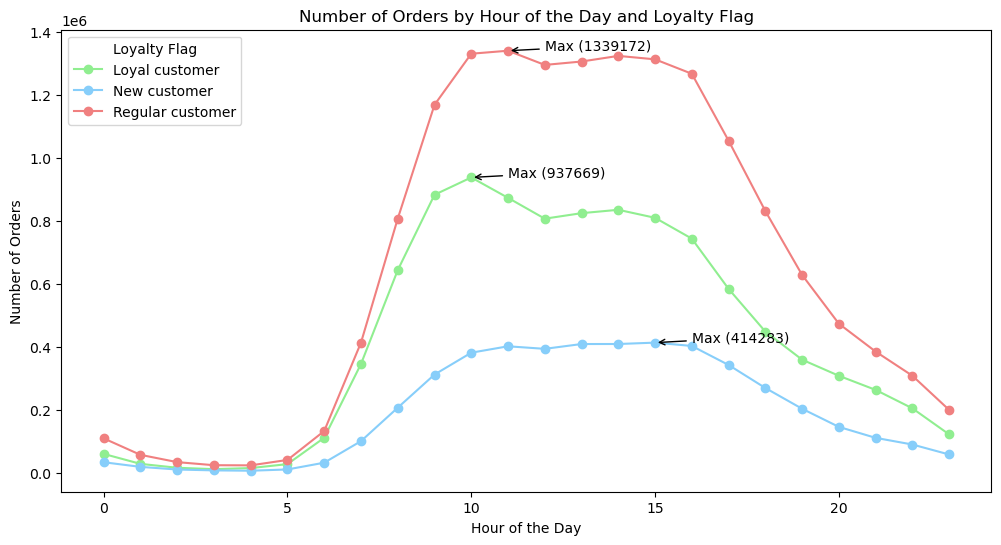

In [60]:
# Create a line chart
line_loyalty_flag_hours=ax = crosstab_loyalty_flag_vs__order_hour_of_day.plot(kind='line', figsize=(12, 6), marker='o',color=colors)

# Set the labels for the axes
ax.set_xlabel('Hour of the Day')
ax.set_ylabel('Number of Orders')
colors=['lightgreen', 'lightskyblue', 'lightcoral']
# Set the title of the chart
plt.title('Number of Orders by Hour of the Day and Loyalty Flag')

# Customize the legend
ax.legend(title='Loyalty Flag', loc='upper left')
# Find and annotate the maximum values for each group
for column in crosstab_loyalty_flag_vs__order_hour_of_day.columns:
    max_value = crosstab_loyalty_flag_vs__order_hour_of_day[column].max()
    max_index = crosstab_loyalty_flag_vs__order_hour_of_day[column].idxmax()
    ax.annotate(f'Max ({max_value})', xy=(max_index, max_value), xytext=(max_index + 1, max_value + 2000),
                arrowprops=dict(arrowstyle='->'))
     # Save the chart as a variable
line_loyalty_flag_hours = plt.gcf()

In [61]:
# Exporting chart 
line_loyalty_flag_hours.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'line_loyalty_flag_hours.png'))

In [62]:
#checking 
crosstab_loyal_vs_median_prior_orders = pd.crosstab(
    active_cust_dpt['median_prior_orders'],
    active_cust_dpt['loyalty_flag'],
    dropna=False,
    values=active_cust_dpt['user_id'],  
    aggfunc='nunique'
)

In [63]:
crosstab_loyal_vs_median_prior_orders

loyalty_flag,Loyal customer,New customer,Regular customer
median_prior_orders,,,
0.0,19.0,68.0,14.0
0.5,NaN,5.0,NaN
1.0,182.0,193.0,111.0
1.5,3.0,9.0,3.0
2.0,768.0,347.0,393.0
...,...,...,...
28.0,NaN,1635.0,431.0
28.5,NaN,86.0,23.0
29.0,NaN,1177.0,283.0


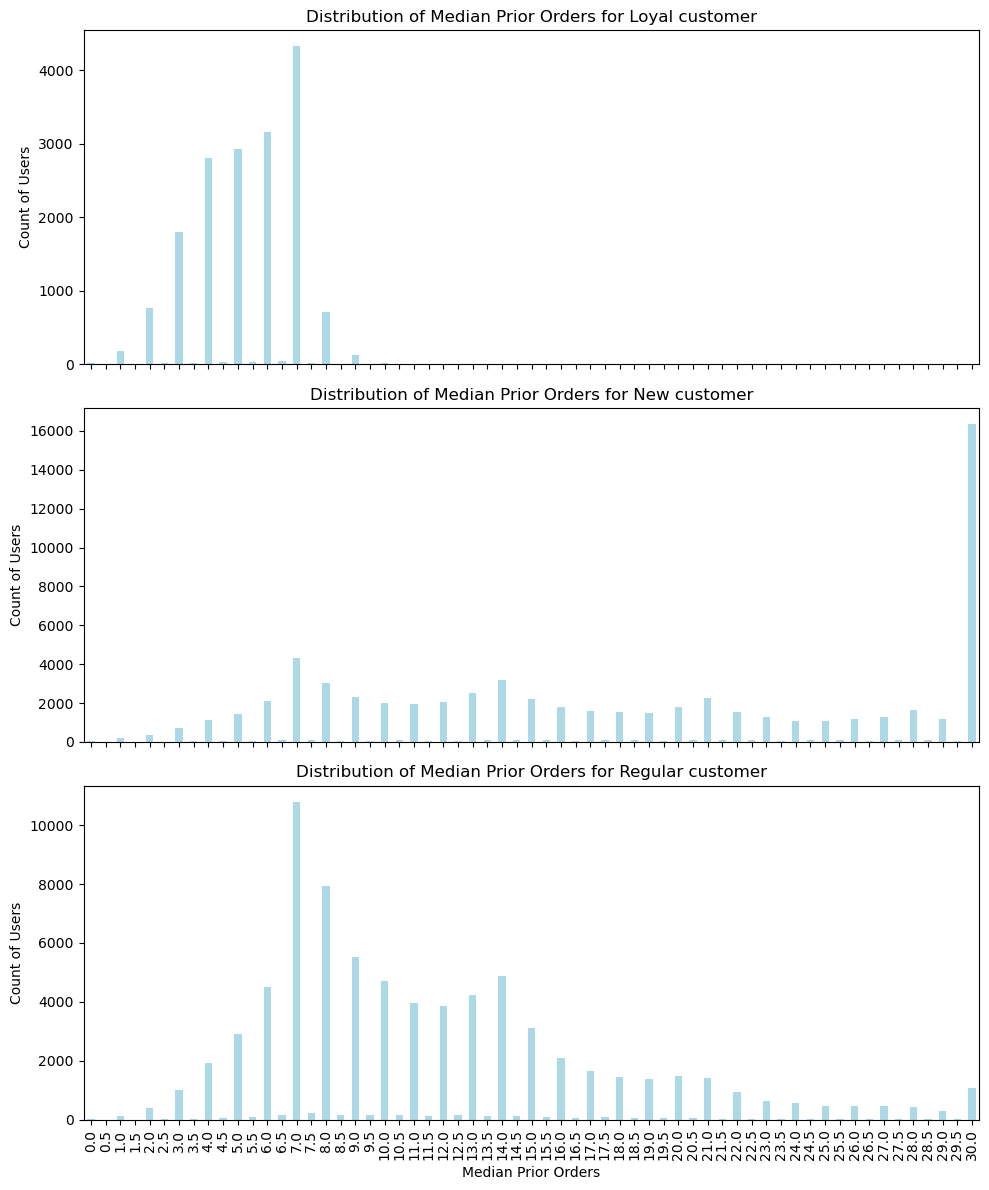

In [64]:
# Create a list of loyalty flags
loyalty_flags = crosstab_loyal_vs_median_prior_orders.columns.tolist()

# Create a dictionary to store the figures
loyalty_histograms = {}

# Create subplots for each loyalty flag
fig, axs = plt.subplots(len(loyalty_flags), figsize=(10, 12), sharex=True)

# Plot histograms for each loyalty flag and store the figures in the dictionary
for i, loyalty_flag in enumerate(loyalty_flags):
    ax = axs[i]
    data = crosstab_loyal_vs_median_prior_orders[loyalty_flag]
    chart = data.plot(kind='bar', ax=ax, color='lightblue')
    ax.set_title(f'Distribution of Median Prior Orders for {loyalty_flag}')
    ax.set_xlabel('Median Prior Orders')
    ax.set_ylabel('Count of Users')
    loyalty_histograms[loyalty_flag] = chart.get_figure()  # Store the figure object

# Set common x-axis label
plt.xlabel('Median Prior Orders')

# Adjust layout
plt.tight_layout()

# Show the histograms
plt.show()

# Now, you can access the chart for 'Loyal customer' using the get_figure() method
loyal_customer_chart = loyalty_histograms['Loyal customer']

In [65]:
# Exporting chart 
loyal_customer_chart.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'loyal_customer_histograms.png'))

# 5.c Are there differences in ordering habits based on a customer’s region?

In [66]:
# Count the occurrences 
region_orders_distribution = active_cust_dpt['region'].value_counts()

In [67]:
region_orders_distribution

South        10311139
West          7927227
Midwest       7261513
Northeast     5464685
Name: region, dtype: int64

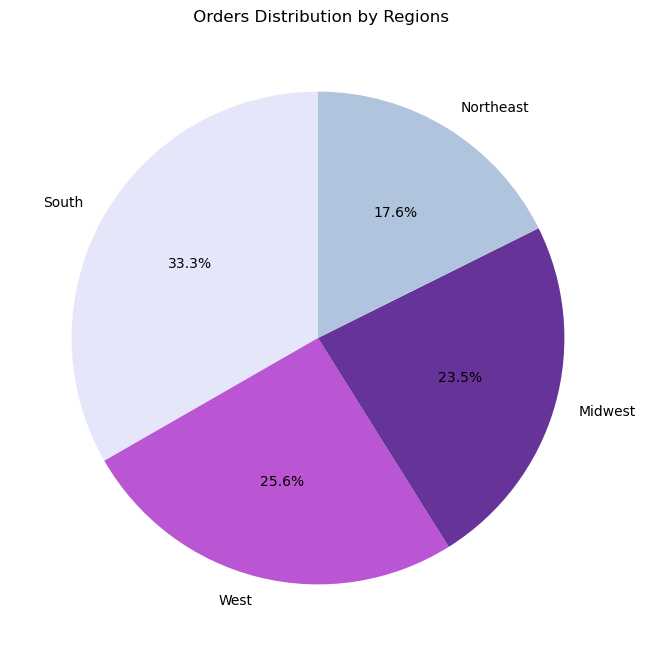

In [68]:
def create_region_pie_chart(data_series):
    # Define colors for the pie chart
    colors = ['lavender', 'mediumorchid', 'rebeccapurple', 'lightsteelblue']

    # Create a figure and axis
    fig_orders, ax = plt.subplots(figsize=(8, 8))

    # Create the pie chart
    pie = ax.pie(data_series, autopct='%1.1f%%', startangle=90, colors=colors, labels=data_series.index)

    # Set the title
    ax.set_title(' Orders Distribution by Regions')

    # Return the figure
    return fig_orders

# Call the function 
region_orders_distribution = active_cust_dpt['region'].value_counts()
fig_orders = create_region_pie_chart(region_orders_distribution)




In [69]:
# Exporting chart 
fig_orders.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'fig_orders_region.png'))

In [70]:
#users by region
region_customers_distribution = active_cust_dpt.groupby(['region']).user_id.nunique().sort_index()

In [71]:
region_customers_distribution

region
Midwest      38376
Northeast    28581
South        54193
West         41481
Name: user_id, dtype: int64

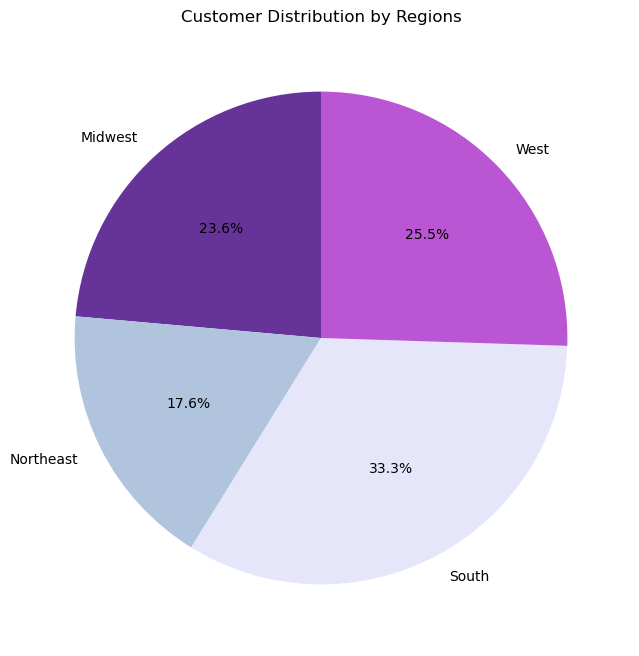

In [72]:
def create_pie_chart(data_series, title, colors):
    # Create a figure and axis
    fig_customers_region, ax = plt.subplots(figsize=(8, 8))

    # Create the pie chart
    pie = ax.pie(data_series, autopct='%1.1f%%', startangle=90, colors=colors, labels=data_series.index)

    # Set the title
    ax.set_title(title)

    # Return the figure
    return fig_customers_region

# Define the data and colors
region_customers_distribution = active_cust_dpt.groupby(['region']).user_id.nunique().sort_index()
colors = ['rebeccapurple', 'lightsteelblue', 'lavender', 'mediumorchid']

# Call the function with your data
fig_customers_region = create_pie_chart(region_customers_distribution, 'Customer Distribution by Regions', colors)


In [73]:
# Exporting chart 
fig_customers_region.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'fig_customers_region.png'))

In [74]:
#checking region_vs__day_of_week
crosstab_region_vs__day_of_week = pd.crosstab(
    active_cust_dpt['orders_day_of_week'],
    active_cust_dpt['region'],
    dropna=False,
    
)

In [75]:
crosstab_region_vs__day_of_week

region,Midwest,Northeast,South,West
orders_day_of_week,,,,
0,1390189,1043698,1955352,1519371
1,1263655,954332,1808348,1385351
2,947370,713159,1340387,1023790
3,855316,649305,1229002,935912
4,851501,637781,1205497,930215
5,943396,716128,1342849,1031356
6,1010086,750282,1429704,1101232


In [76]:
#checking 
crosstab_region_vs_median_prior_orders = pd.crosstab(
    active_cust_dpt['region'],
    active_cust_dpt['median_prior_orders'],
    dropna=False,
    values=active_cust_dpt['user_id'],  # Assuming 'user_id' is a unique identifier for each user
    aggfunc='nunique'
)

In [77]:
crosstab_region_vs_median_prior_orders

median_prior_orders,0.0,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0,5.5,6.0,6.5,7.0,7.5,8.0,8.5,9.0,9.5,10.0,10.5,11.0,11.5,12.0,12.5,13.0,13.5,14.0,14.5,15.0,15.5,16.0,16.5,17.0,17.5,18.0,18.5,19.0,19.5,20.0,20.5,21.0,21.5,22.0,22.5,23.0,23.5,24.0,24.5,25.0,25.5,26.0,26.5,27.0,27.5,28.0,28.5,29.0,29.5,30.0
region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Midwest,20.0,NaN,104.0,1.0,336.0,13.0,810.0,28.0,1351.0,28.0,1703.0,46.0,2294.0,78.0,4606.0,73.0,2805.0,51.0,1869.0,53.0,1525.0,60.0,1369.0,39.0,1433.0,51.0,1624.0,57.0,1954.0,45.0,1277.0,40.0,907.0,30.0,763.0,45.0,675.0,47.0,653.0,41.0,729.0,37.0,912.0,28.0,609.0,28.0,440.0,29.0,385.0,33.0,332.0,40.0,359.0,29.0,422.0,23.0,499.0,27.0,344.0,21.0,4146.0
Northeast,18.0,1.0,88.0,6.0,268.0,10.0,598.0,23.0,1083.0,35.0,1283.0,31.0,1692.0,50.0,3428.0,68.0,2025.0,44.0,1368.0,44.0,1182.0,41.0,1079.0,36.0,1032.0,26.0,1163.0,38.0,1407.0,39.0,959.0,26.0,689.0,22.0,545.0,26.0,563.0,22.0,571.0,12.0,615.0,25.0,596.0,24.0,419.0,18.0,360.0,9.0,278.0,22.0,260.0,14.0,311.0,10.0,292.0,14.0,363.0,15.0,258.0,15.0,3022.0
South,29.0,1.0,160.0,4.0,502.0,15.0,1218.0,24.0,1947.0,54.0,2460.0,58.0,3256.0,91.0,6423.0,136.0,3874.0,79.0,2649.0,94.0,2240.0,86.0,1951.0,68.0,1960.0,76.0,2225.0,84.0,2639.0,68.0,1764.0,56.0,1311.0,32.0,1107.0,55.0,994.0,44.0,991.0,35.0,1056.0,44.0,1219.0,39.0,842.0,34.0,608.0,27.0,553.0,30.0,549.0,34.0,563.0,35.0,573.0,30.0,675.0,35.0,481.0,30.0,5876.0
West,34.0,3.0,134.0,4.0,402.0,14.0,871.0,19.0,1489.0,34.0,1829.0,41.0,2524.0,76.0,4977.0,80.0,2946.0,64.0,2108.0,59.0,1766.0,77.0,1535.0,44.0,1495.0,56.0,1757.0,65.0,2056.0,45.0,1333.0,52.0,955.0,37.0,798.0,44.0,747.0,39.0,673.0,32.0,847.0,34.0,929.0,30.0,631.0,28.0,505.0,26.0,431.0,27.0,391.0,24.0,414.0,22.0,447.0,21.0,529.0,32.0,377.0,21.0,4401.0


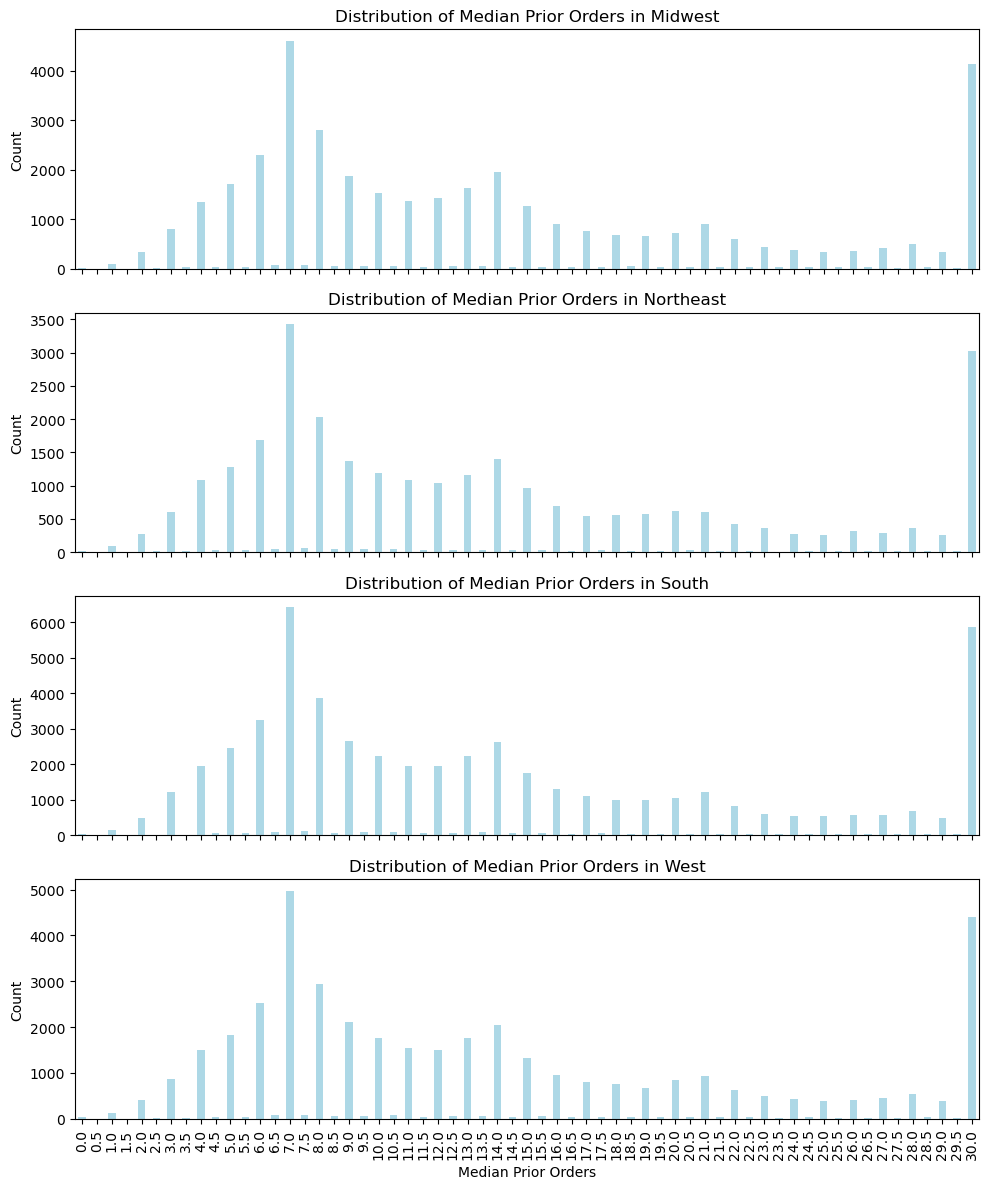

In [78]:
# Create a list of regions
regions = crosstab_region_vs_median_prior_orders.index.tolist()

# Create subplots for each region
fig, axs = plt.subplots(len(regions), figsize=(10, 12), sharex=True)

# Plot histograms for each region
for i, region in enumerate(regions):
    ax = axs[i]
    data = crosstab_region_vs_median_prior_orders.loc[region]
    data.plot(kind='bar', ax=ax, color='lightblue')
    ax.set_title(f'Distribution of Median Prior Orders in {region}')
    ax.set_xlabel('Median Prior Orders')
    ax.set_ylabel('Count')

# Set common x-axis label
plt.xlabel('Median Prior Orders')

# Adjust layout
plt.tight_layout()

# Show the histograms
plt.show()







In [79]:
#checking region_department
crosstab_region_vs__department = pd.crosstab(
    active_cust_dpt['department'],
    active_cust_dpt['region'],
    dropna=False,
    
)

In [80]:
crosstab_region_vs__department

region,Midwest,Northeast,South,West
department,,,,
alcohol,34043,25017,48813,36754
babies,95741,72712,139511,102428
bakery,261753,199300,371620,288155
beverages,598979,462929,859419,650574
breakfast,156155,117904,223172,173619
bulk,7929,5599,11180,8743
canned goods,237459,176936,337458,260221
dairy eggs,1212490,914616,1723016,1327060
deli,234464,178398,333620,257352


In [81]:
# Sort the DataFrame by the 'South' region
crosstab_region_vs__department_sorted = crosstab_region_vs__department.sort_values(by='South', ascending=False)

In [82]:
crosstab_region_vs__department_sorted

region,Midwest,Northeast,South,West
department,,,,
produce,2134115,1593004,3027476,2324678
dairy eggs,1212490,914616,1723016,1327060
snacks,645143,493154,916780,711329
beverages,598979,462929,859419,650574
frozen,498225,370436,709906,543164
pantry,420334,312731,591754,457886
bakery,261753,199300,371620,288155
canned goods,237459,176936,337458,260221
deli,234464,178398,333620,257352


<Figure size 1400x800 with 0 Axes>

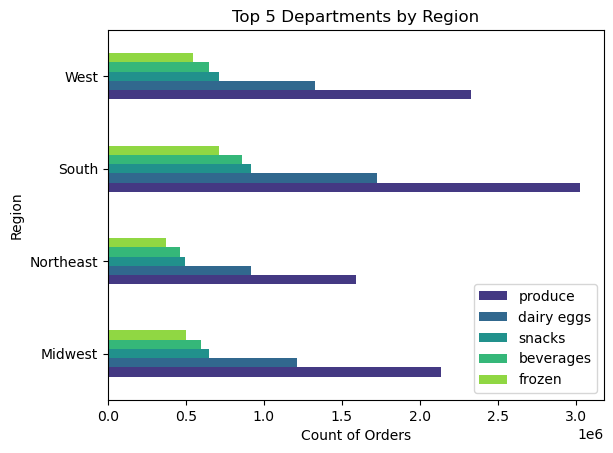

In [113]:
# Select the top 5 departments for each region
top_5_departments_by_region = crosstab_region_vs__department_sorted.head(5)

# Transpose the DataFrame for a horizontal bar chart
top_5_departments_by_region = top_5_departments_by_region.T

# Define a custom color palette similar to Viridis
custom_palette = sns.color_palette("viridis", n_colors=5)

# Create a grouped horizontal bar chart with separate bars and custom colors

plt.figure(figsize=(14, 8))
ax = top_5_departments_by_region.plot(kind='barh', width=0.50, color=custom_palette)

# Set labels and title
plt.xlabel('Count of Orders')
plt.ylabel('Region')
plt.title('Top 5 Departments by Region')

# Move the legend to the bottom right corner
ax.legend(loc='lower right')


# 5.d Is there a connection between age and family status in terms of ordering habits?


In [84]:
#checking connection between age and family status 
crosstab_age_family_status = pd.crosstab(
    active_cust_dpt['age_group'],
    active_cust_dpt['Family_Status_Flag'],
    dropna=False,
    values=active_cust_dpt['user_id'],  # Assuming 'user_id' is a unique identifier for each user
    aggfunc='nunique'
)

In [85]:
crosstab_age_family_status

Family_Status_Flag,Married with Dependants,Married with no Dependants,Single no Dependants,Single with Dependants
age_group,,,,
Middle-aged Adults,31582.0,16161.0,15964.0,NaN
Senior Citizens,28036.0,13906.0,13831.0,NaN
Young Adults,16543.0,8068.0,10932.0,7608.0


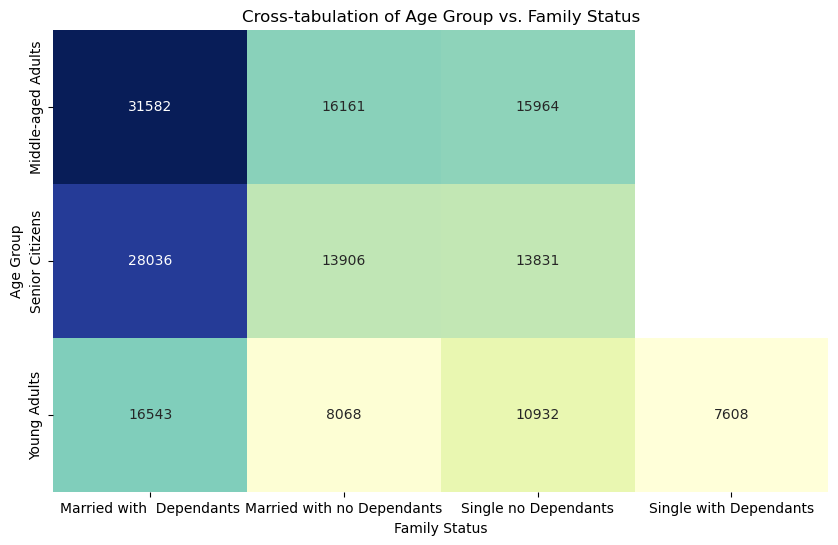

In [92]:
# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(crosstab_age_family_status, annot=True, cmap="YlGnBu", fmt=".0f", cbar=False)
plt.title("Cross-tabulation of Age Group vs. Family Status")
plt.xlabel("Family Status")
plt.ylabel("Age Group")
plt.show()




In [93]:
# checking 'age_group' with 'order_frequency_flag status'

age_order_freq=pd.crosstab(active_cust_dpt['order_frequency_flag'],active_cust_dpt['age_group'],dropna=False)

In [94]:
age_order_freq

age_group,Middle-aged Adults,Senior Citizens,Young Adults
order_frequency_flag,,,
Frequent customer,8317998,7252218,5634260
Non-frequent customer,1137833,990538,766604
Regular customer,2691934,2331748,1841431


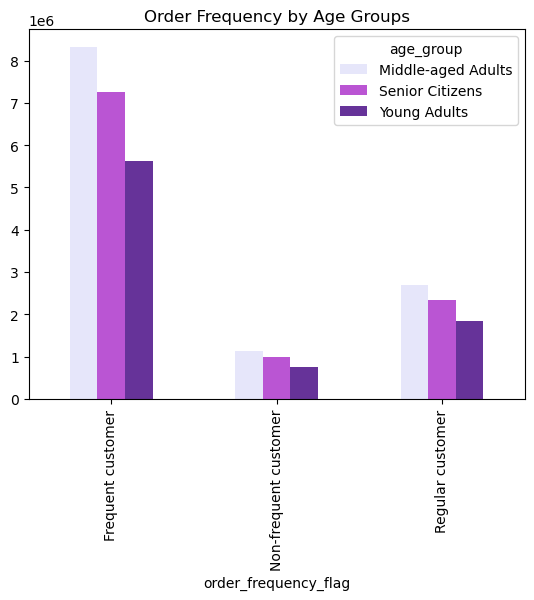

In [95]:
# visualizing the above 'age_order_freq' crosstab 

age_order_freq_bar=age_order_freq.plot.bar(title='Order Frequency by Age Groups',color=['lavender','mediumorchid','rebeccapurple'])

In [97]:
crosstab1_fam_status_vs_department = pd.crosstab(
    active_cust_dpt['department'],
    active_cust_dpt['Family_Status_Flag'],
    dropna=False,
    
)

In [98]:
sorted_crosstab1_fam_status_vs_department = crosstab1_fam_status_vs_department.sort_values(by="Single with Dependants", ascending=False)

In [99]:
sorted_crosstab1_fam_status_vs_department.head()

Family_Status_Flag,Married with Dependants,Married with no Dependants,Single no Dependants,Single with Dependants
department,,,,
produce,4262296,2110997,2275441,430539
dairy eggs,2421459,1211140,1294376,250207
snacks,1301249,643409,690438,131310
beverages,1209634,597819,645341,119107
frozen,999057,490333,529348,102993


Creating chart 

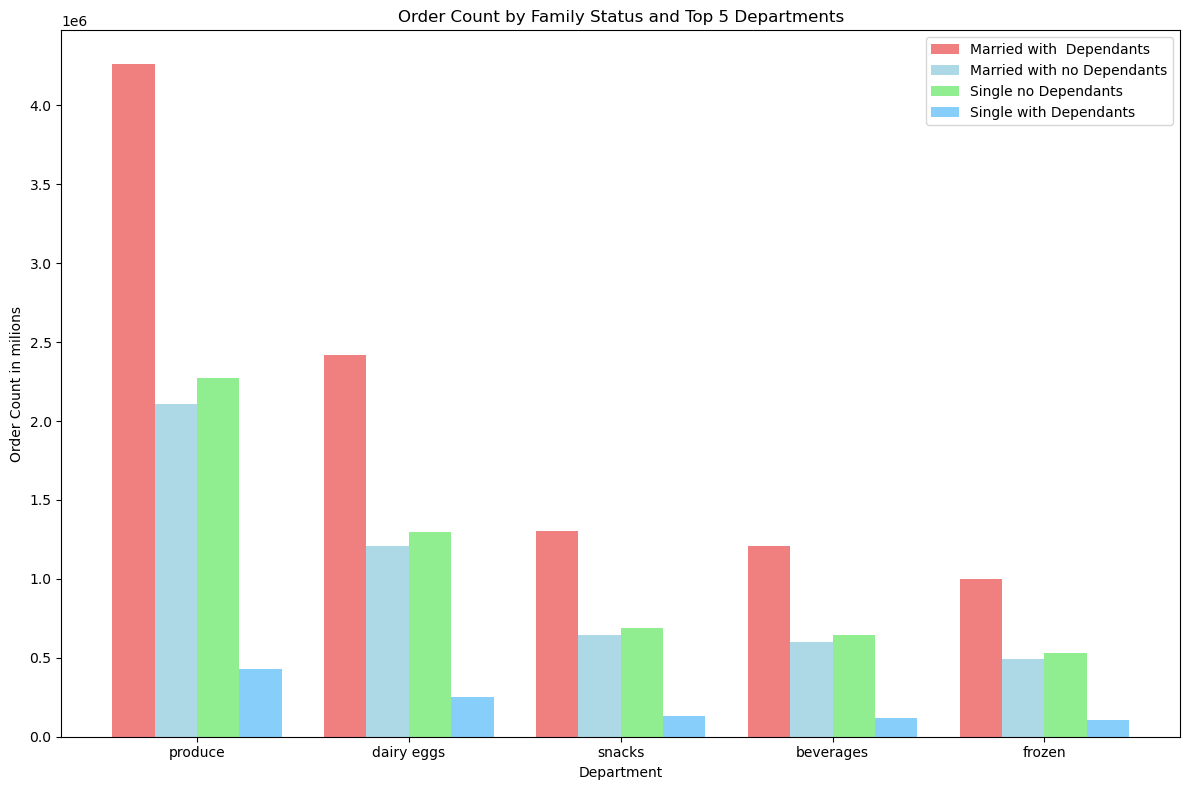

In [103]:
def create_grouped_bar_chart(dataframe, x_label, y_label, title, colors):
    # Extract data from the DataFrame
    categories = dataframe.index
    num_categories = len(categories)
    family_statuses = dataframe.columns
    num_family_statuses = len(family_statuses)
    
    # Set the width of the bars and the positions for each category
    bar_width = 0.2
    index = np.arange(num_categories)
    
    # Create subplots
    fig, ax = plt.subplots(figsize=(12, 8))
    
    # Create bars for each family status with specified colors
    for i, (family_status, color) in enumerate(zip(family_statuses, colors)):
        bars = ax.bar(index + (i * bar_width), dataframe[family_status], bar_width, label=family_status, color=color)

    # Set labels and title
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_title(title)
    ax.set_xticks(index + (bar_width * (num_family_statuses - 1) / 2))
    ax.set_xticklabels(categories)
    ax.legend()
    
    # Show the chart
    plt.tight_layout()
    
    # Return the chart as a variable
    return fig

# Define your custom colors
custom_colors = ['lightcoral', 'lightblue', 'lightgreen', 'lightskyblue']

# Create the chart with custom colors
grouped_bar_chart = create_grouped_bar_chart(
    sorted_crosstab1_fam_status_vs_department.head(),
    x_label="Department",
    y_label="Order Count in milions",
    title="Order Count by Family Status and Top 5 Departments",
    colors=custom_colors
)

In [104]:
# Exporting chart 
grouped_bar_chart.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'grouped_bar_chart_family_department.png'))

In [124]:
selected_columns = ["age_group", "Family_Status_Flag", "days_since_last-order"]
filtered_df1 = active_cust_dpt[selected_columns].copy()

In [126]:
filtered_df1.dropna(subset=selected_columns, inplace=True)

In [138]:
filtered_df1 = filtered_df1.rename(columns={"days_since_last-order": "days_since_last_order"})


In [139]:
filtered_df1.head(20)

,age_group,Family_Status_Flag,days_since_last_order
0,Middle-aged Adults,Married with Dependants,30.0
1,Middle-aged Adults,Married with Dependants,11.0
2,Middle-aged Adults,Married with Dependants,10.0
3,Middle-aged Adults,Single no Dependants,30.0
4,Middle-aged Adults,Single no Dependants,16.0
5,Middle-aged Adults,Single no Dependants,26.0
6,Middle-aged Adults,Single no Dependants,30.0
7,Middle-aged Adults,Married with Dependants,4.0
8,Middle-aged Adults,Married with Dependants,3.0
9,Middle-aged Adults,Married with Dependants,7.0


# 5.e What different classifications does the demographic information suggest? Age? Income? Certain types of goods? Family status?


In [250]:
#order distrubution by income
order_distribution_by_income = active_cust_dpt['Income_Group'].value_counts()

In [251]:
order_distribution_by_income

Medium Income    15042617
Low Income        8520533
High Income       7401414
Name: Income_Group, dtype: int64

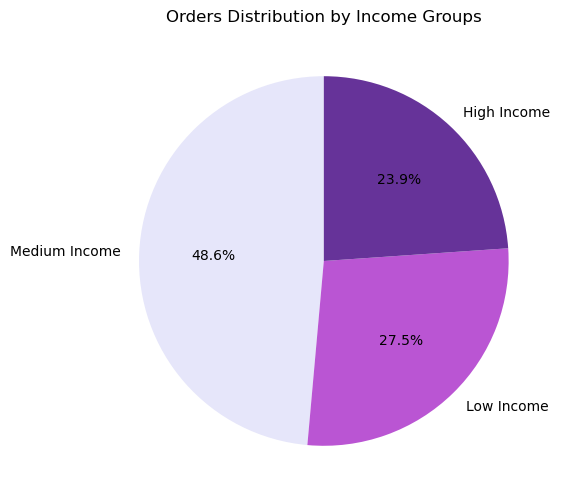

In [264]:
# Create a pie chart
order_distribution_by_income = active_cust_dpt['Income_Group'].value_counts()
plt.figure(figsize=(6, 6))  # Set the figure size
order_distribution_by_income.plot.pie(autopct='%1.1f%%', startangle=90, colors=['lavender', 'mediumorchid', 'rebeccapurple'], labels=order_distribution_by_income.index)

# Set the title
plt.title('Orders Distribution by Income Groups')

# Remove the y-axis label
plt.ylabel('')

# Show the pie chart
plt.show()

# Other visualizations to be found in previous script(4.10 Coding Etiquette & Excel Reporting 1.3

Crosstabs exploring baby_stuff and alcohol columns

In [144]:
#checking connection between baby stuff and region
crosstab_baby_region = pd.crosstab(
    active_cust_dpt['baby_stuff'],
    active_cust_dpt['region'],
    dropna=False,
    values=active_cust_dpt['user_id'],  # Assuming 'user_id' is a unique identifier for each user
    aggfunc='nunique'
)

In [145]:
crosstab_baby_region

region,Midwest,Northeast,South,West
baby_stuff,,,,
0,31171,23256,44140,33834
1,7205,5325,10053,7647


In [146]:
#checking connection between baby stuff and age_group
crosstab_baby_age_group = pd.crosstab(
    active_cust_dpt['baby_stuff'],
    active_cust_dpt['age_group'],
    dropna=False,
    values=active_cust_dpt['user_id'],  # Assuming 'user_id' is a unique identifier for each user
    aggfunc='nunique'
)

In [147]:
crosstab_baby_age_group

age_group,Middle-aged Adults,Senior Citizens,Young Adults
baby_stuff,,,
0,51867,45330,35204
1,11840,10443,7947


In [148]:
#checking connection between baby stuff and fam_status
crosstab_baby_fam_status = pd.crosstab(
    active_cust_dpt['baby_stuff'],
    active_cust_dpt['Family_Status_Flag'],
    dropna=False,
    values=active_cust_dpt['user_id'],  # Assuming 'user_id' is a unique identifier for each user
    aggfunc='nunique'
)

In [149]:
crosstab_baby_fam_status

Family_Status_Flag,Married with Dependants,Married with no Dependants,Single no Dependants,Single with Dependants
baby_stuff,,,,
0,61901,31146,33150,6204
1,14260,6989,7577,1404


In [157]:
#checking connection between baby stuff and order_frequency_flag
crosstab_baby_order_frequency_flag = pd.crosstab(
    active_cust_dpt['baby_stuff'],
    active_cust_dpt['order_frequency_flag'],
    dropna=False,
    values=active_cust_dpt['user_id'],  # Assuming 'user_id' is a unique identifier for each user
    aggfunc='nunique'
)

In [158]:
crosstab_baby_order_frequency_flag

order_frequency_flag,Frequent customer,Non-frequent customer,Regular customer
baby_stuff,,,
0,57711,32502,42188
1,18216,4163,7851


In [162]:
#checking connection between baby stuff and median_prior_orders
crosstab_baby_median_prior_orders = pd.crosstab(
    active_cust_dpt['baby_stuff'],
    active_cust_dpt['median_prior_orders'],
    dropna=False,
    values=active_cust_dpt['user_id'],  # Assuming 'user_id' is a unique identifier for each user
    aggfunc='nunique'
)

In [163]:
crosstab_baby_median_prior_orders

median_prior_orders,0.0,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0,5.5,6.0,6.5,7.0,7.5,8.0,8.5,9.0,9.5,10.0,10.5,11.0,11.5,12.0,12.5,13.0,13.5,14.0,14.5,15.0,15.5,16.0,16.5,17.0,17.5,18.0,18.5,19.0,19.5,20.0,20.5,21.0,21.5,22.0,22.5,23.0,23.5,24.0,24.5,25.0,25.5,26.0,26.5,27.0,27.5,28.0,28.5,29.0,29.5,30.0
baby_stuff,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,95.0,5.0,422.0,14.0,1133.0,39.0,2439.0,77.0,4041.0,114.0,5152.0,148.0,7187.0,251.0,15173.0,309.0,9101.0,200.0,6256.0,217.0,5338.0,222.0,4831.0,163.0,4887.0,182.0,5665.0,219.0,6849.0,181.0,4506.0,157.0,3235.0,108.0,2735.0,156.0,2546.0,142.0,2487.0,109.0,2808.0,128.0,3175.0,117.0,2144.0,100.0,1661.0,83.0,1427.0,102.0,1323.0,104.0,1450.0,93.0,1520.0,82.0,1859.0,106.0,1309.0,84.0,15635.0
1,6.0,NaN,64.0,1.0,375.0,13.0,1058.0,17.0,1829.0,37.0,2123.0,28.0,2579.0,44.0,4261.0,48.0,2549.0,38.0,1738.0,33.0,1375.0,42.0,1103.0,24.0,1033.0,27.0,1104.0,25.0,1207.0,16.0,827.0,17.0,627.0,13.0,478.0,14.0,433.0,10.0,401.0,11.0,439.0,12.0,481.0,4.0,357.0,8.0,252.0,8.0,220.0,10.0,209.0,8.0,197.0,3.0,214.0,6.0,207.0,3.0,151.0,3.0,1810.0


In [151]:
#checking connection between alcohol and region
crosstab_alcohol_region = pd.crosstab(
    active_cust_dpt['alcohol'],
    active_cust_dpt['region'],
    dropna=False,
    values=active_cust_dpt['user_id'],  # Assuming 'user_id' is a unique identifier for each user
    aggfunc='nunique'
)

In [152]:
crosstab_alcohol_region

region,Midwest,Northeast,South,West
alcohol,,,,
0,35294,26302,49748,38136
1,3082,2279,4445,3345


In [153]:
#checking connection between alcohol and age_group
crosstab_alcohol_age_group = pd.crosstab(
    active_cust_dpt['alcohol'],
    active_cust_dpt['age_group'],
    dropna=False,
    values=active_cust_dpt['user_id'],  # Assuming 'user_id' is a unique identifier for each user
    aggfunc='nunique'
)

In [154]:
crosstab_alcohol_age_group

age_group,Middle-aged Adults,Senior Citizens,Young Adults
alcohol,,,
0,58484,51317,39679
1,5223,4456,3472


In [155]:
#checking connection between alcohol and Family_Status_Flag
crosstab_alcohol_Family_Status_Flag = pd.crosstab(
    active_cust_dpt['alcohol'],
    active_cust_dpt['Family_Status_Flag'],
    dropna=False,
    values=active_cust_dpt['user_id'],  # Assuming 'user_id' is a unique identifier for each user
    aggfunc='nunique'
)

In [156]:
crosstab_alcohol_Family_Status_Flag

Family_Status_Flag,Married with Dependants,Married with no Dependants,Single no Dependants,Single with Dependants
alcohol,,,,
0,69971,35071,37480,6958
1,6190,3064,3247,650


In [160]:
#checking connection between alcohol  and order_frequency_flag
crosstab_alcohol_order_frequency_flag = pd.crosstab(
    active_cust_dpt['alcohol'],
    active_cust_dpt['order_frequency_flag'],
    dropna=False,
    values=active_cust_dpt['user_id'],  # Assuming 'user_id' is a unique identifier for each user
    aggfunc='nunique'
)

In [161]:
crosstab_alcohol_order_frequency_flag

order_frequency_flag,Frequent customer,Non-frequent customer,Regular customer
alcohol,,,
0,69348,34130,46002
1,6579,2535,4037


In [164]:
#checking connection between alcohol  
crosstab_alcohol_orders_day_of_week = pd.crosstab(
    active_cust_dpt['alcohol'],
    active_cust_dpt['orders_day_of_week'],
    dropna=False,
    )

In [165]:
crosstab_alcohol_orders_day_of_week

orders_day_of_week,0,1,2,3,4,5,6
alcohol,,,,,,,
0,5527438,5019583,3712936,3371229,3326165,3701114,3975609
1,381172,392103,311770,298306,298829,332615,315695


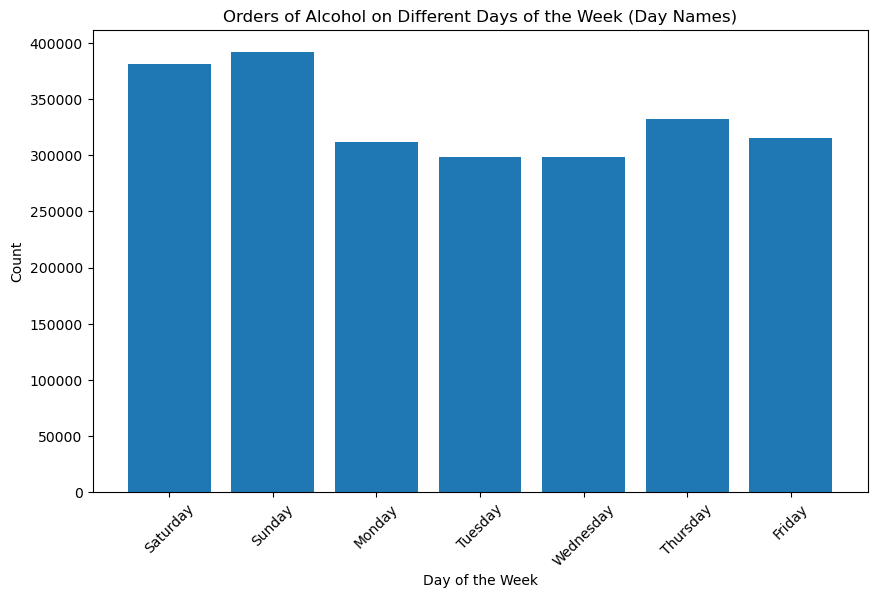

In [196]:

day_names = ['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
values_alcohol_1 = [381172, 392103, 311770, 298306, 298829, 332615, 315695]

# Create a bar plot
plt.figure(figsize=(10, 6))  
plt.bar(day_names, values_alcohol_1)
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.title('Orders of Alcohol on Different Days of the Week (Day Names)')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability

plt.show()

In [166]:
#checking connection between baby and day of week  
crosstab_baby_orders_day_of_week = pd.crosstab(
    active_cust_dpt['baby_stuff'],
    active_cust_dpt['orders_day_of_week'],
    dropna=False,
    )

In [167]:
crosstab_baby_orders_day_of_week

orders_day_of_week,0,1,2,3,4,5,6
baby_stuff,,,,,,,
0,4000307,3742424,2752432,2501155,2448691,2786812,2922490
1,1908303,1669262,1272274,1168380,1176303,1246917,1368814


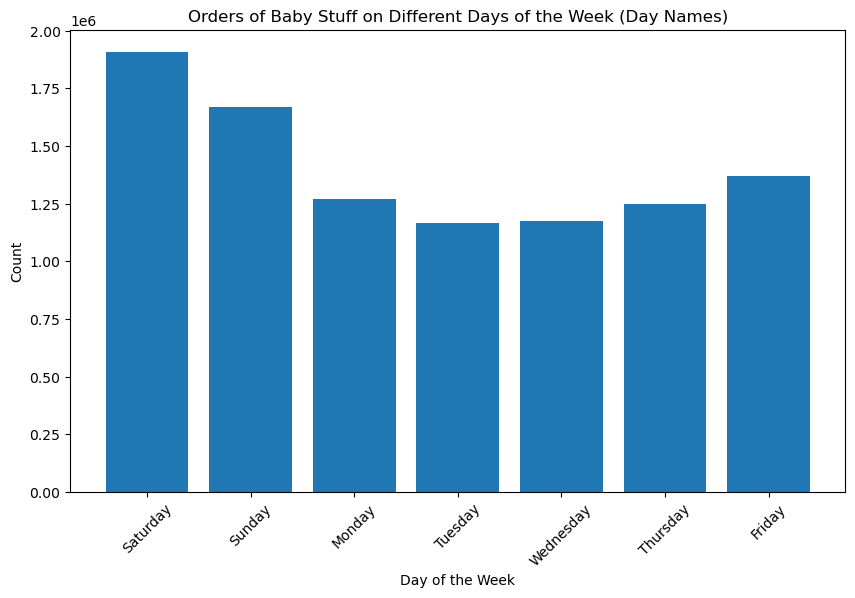

In [198]:
day_names = ['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
values_baby_stuff_1 = [1908303, 1669262, 1272274, 1168380, 1176303, 1246917, 1368814]

# Create a bar plot
plt.figure(figsize=(10, 6))  
plt.bar(day_names, values_baby_stuff_1)
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.title('Orders of Baby Stuff on Different Days of the Week (Day Names)')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability

plt.show()

In [188]:
#checking connection between alcohol and hours 
crosstab_alcohol_hours = pd.crosstab(
    active_cust_dpt['order_hour_of_day'],
    active_cust_dpt['alcohol'],
    dropna=False,
    )

In [189]:
crosstab_alcohol_hours

alcohol,0,1
order_hour_of_day,,
0,196453,11589
1,102345,7276
2,61049,4642
3,45226,3570
4,46699,4064
5,78240,6178
6,262801,18212
7,810748,52465
8,1550628,108482


In [190]:
#checking connection between baby and hours 
crosstab_baby_hours = pd.crosstab(
    active_cust_dpt['order_hour_of_day'],
    active_cust_dpt['baby_stuff'],
    dropna=False,
    )

In [192]:
crosstab_baby_hours

baby_stuff,0,1
order_hour_of_day,,
0,148071,59971
1,82543,27078
2,49614,16077
3,35881,12915
4,36176,14587
5,57539,26879
6,173152,107861
7,521414,341799
8,1059629,599481


In [168]:
#checking connection between alcohol  
crosstab_alcohol_state= pd.crosstab(
    active_cust_dpt['alcohol'],
    active_cust_dpt['state'],
    dropna=False,
    )

In [169]:
crosstab_alcohol_state

state,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,Georgia,Hawaii,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maine,Maryland,Massachusetts,Michigan,Minnesota,Mississippi,Missouri,Montana,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,North Dakota,Ohio,Oklahoma,Oregon,Pennsylvania,Rhode Island,South Carolina,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
alcohol,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,566759,578222,575485,559815,584989,563782,551138,558852,536094,555488,587949,559141,533737,553165,554594,558285,567015,558718,561708,562657,548529,576930,562131,575068,564639,575089,558581,548871,555431,541044,557495,574645,565695,578265,568695,551193,574073,561807,595559,580894,563646,557740,543892,561397,549030,540796,570310,555313,534509,542398,572816
1,43950,42463,49735,45998,45166,46976,43097,50502,50761,46248,40882,46091,45185,51801,46124,40427,42898,44531,45086,46008,50014,41735,41391,46180,38670,37389,49208,46678,50186,46248,40860,51511,40748,45401,42465,47889,51407,46052,45275,47048,45753,47496,45414,50351,36850,41458,43267,50890,48261,56531,43935


In [170]:
sorted_crosstab = crosstab_alcohol_state.sort_values(by=1, axis=1, ascending=False)


In [171]:
sorted_crosstab

state,Wisconsin,Illinois,New Mexico,Oklahoma,Washington,District of Columbia,Delaware,Texas,Nevada,Maryland,Arizona,Montana,West Virginia,Ohio,South Dakota,Rhode Island,Colorado,Nebraska,Florida,New Hampshire,Minnesota,Indiana,Hawaii,Oregon,Maine,Arkansas,South Carolina,Tennessee,North Carolina,Pennsylvania,Idaho,California,Louisiana,Kentucky,Alabama,Wyoming,Virginia,Connecticut,Kansas,North Dakota,Alaska,Massachusetts,Vermont,Michigan,Georgia,New Jersey,New York,Iowa,Mississippi,Missouri,Utah
alcohol,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,542398,553165,574645,574073,555313,536094,558852,561397,555431,548529,575485,558581,534509,551193,557740,580894,563782,548871,555488,541044,575068,554594,559141,561807,562657,559815,563646,543892,578265,595559,533737,584989,561708,558718,566759,572816,570310,551138,567015,568695,578222,576930,540796,562131,587949,557495,565695,558285,564639,575089,549030
1,56531,51801,51511,51407,50890,50761,50502,50351,50186,50014,49735,49208,48261,47889,47496,47048,46976,46678,46248,46248,46180,46124,46091,46052,46008,45998,45753,45414,45401,45275,45185,45166,45086,44531,43950,43935,43267,43097,42898,42465,42463,41735,41458,41391,40882,40860,40748,40427,38670,37389,36850


In [172]:
#checking connection between alcohol  
crosstab_alcohol_baby_stuff= pd.crosstab(
    active_cust_dpt['baby_stuff'],
    active_cust_dpt['state'],
    dropna=False,
    )

In [173]:
sorted_crosstab_baby_state = crosstab_alcohol_baby_stuff.sort_values(by=1, axis=1, ascending=False)

In [174]:
sorted_crosstab_baby_state

state,Rhode Island,California,Oklahoma,Pennsylvania,Missouri,Georgia,Oregon,South Carolina,Arkansas,Texas,North Dakota,Maryland,Maine,Wisconsin,Virginia,Colorado,Louisiana,New York,Minnesota,Wyoming,Nevada,Michigan,Kansas,Arizona,North Carolina,Alaska,Ohio,New Hampshire,Mississippi,Alabama,Connecticut,Florida,Iowa,Nebraska,Delaware,New Mexico,Massachusetts,Idaho,Hawaii,Illinois,Vermont,Utah,Kentucky,South Dakota,New Jersey,Montana,Indiana,Washington,Tennessee,West Virginia,District of Columbia
baby_stuff,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,413520,420972,419065,436540,408184,424896,404342,406305,403715,410463,411263,399446,409966,400458,415166,412448,409999,410395,425691,421265,410705,409286,416489,431931,430484,428253,407362,395602,411705,419147,403033,411191,408602,406365,421175,439094,432450,393399,419719,419796,397378,401864,419635,423074,416722,428199,421662,427597,414295,408448,415550
1,214422,209183,206415,204294,204294,203935,203517,203094,202098,201285,199897,199097,198699,198471,198411,198310,196795,196048,195557,195486,194912,194236,193424,193289,193182,192432,191720,191690,191604,191562,191202,190545,190110,189184,188179,187062,186215,185523,185513,185170,184876,184016,183614,182162,181633,179590,179056,178606,175011,174322,171305
